# Scatterplot Matrisi

* Scatterplot matrix (dağılım matrisi), birden fazla değişken arasındaki ilişkiyi görmek için kullanılan grafikler bütünüdür. Seaborn’da pairplot() fonksiyonu ile oluşturulur.

> 📌 Scatterplot Matrix Nedir?
* Bir veri setindeki bütün sayısal değişkenler arasındaki ilişkileri gösteren bir matristir.
* Her bir hücre, ilgili iki değişken arasındaki scatterplot (dağılım grafiğini) gösterir.
* Ana köşegen (diagonal) genellikle değişkenin kendi dağılımını (histogram veya KDE) içerir.
* Verinin korelasyon yapısını ve doğrusal ilişkilerini anlamak için çok kullanışlıdır.

In [1]:
import seaborn as sns
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
df.shape

(150, 5)

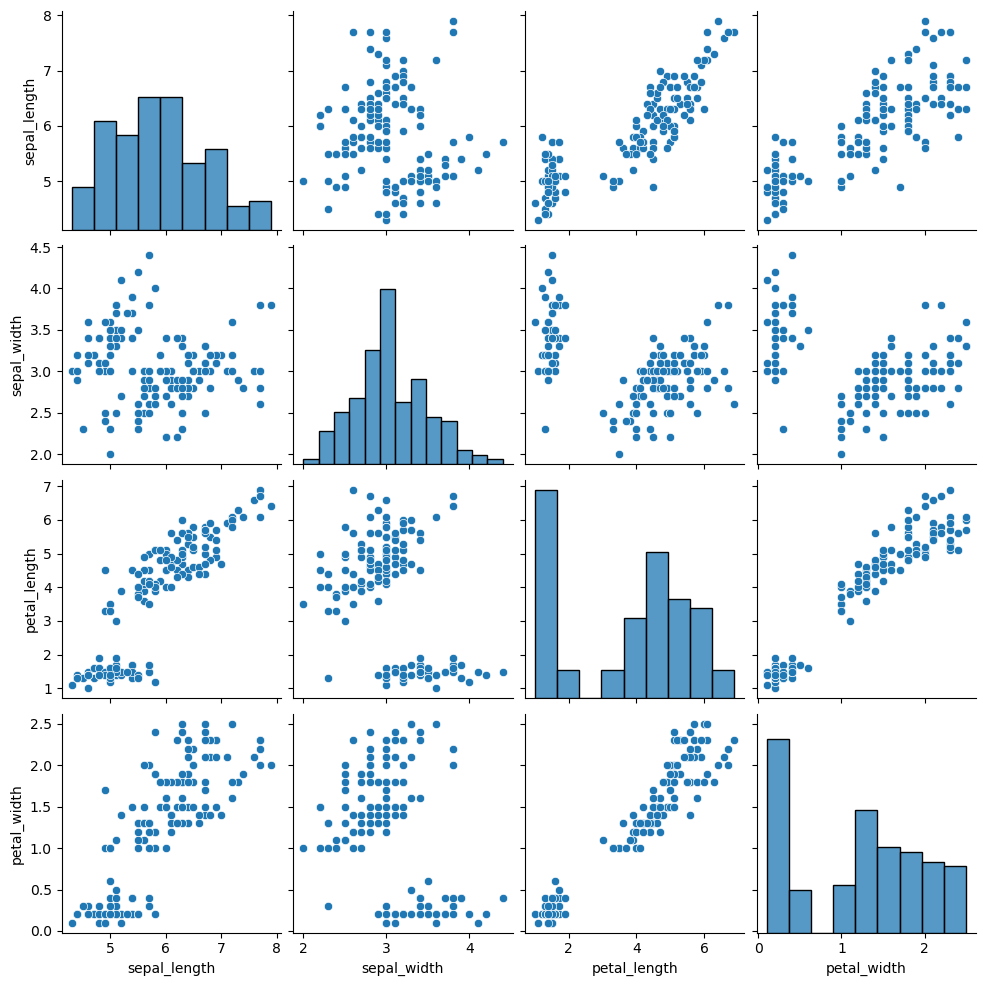

In [7]:
sns.pairplot(df)
# Veri setindeki tüm değişkenlerin birbiriyle olan ilişkilerini görselleştirir.

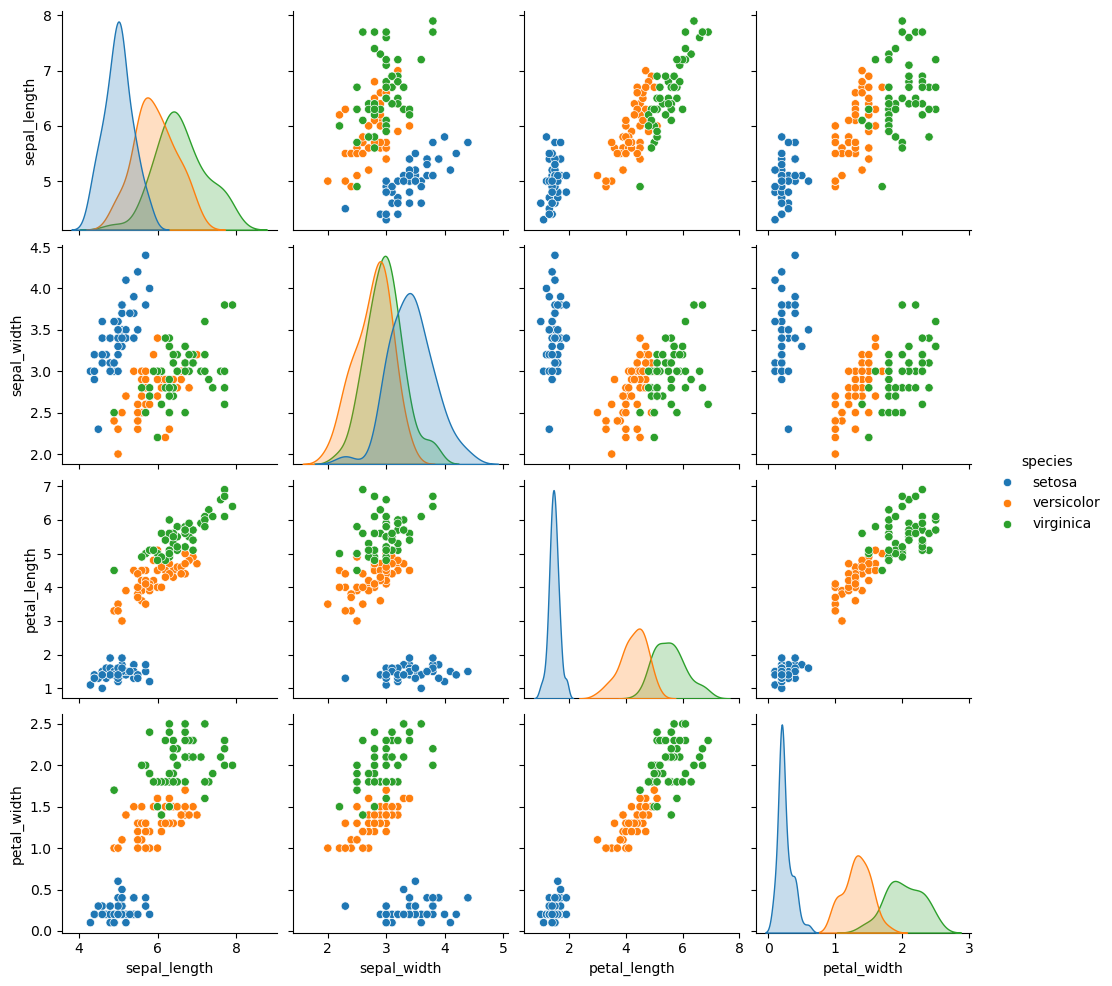

In [9]:
sns.pairplot(df, hue = "species")
# Veri setindeki tüm değişkenlerin birbiriyle olan ilişkilerini görselleştirir ve türlerine göre renklendirir.

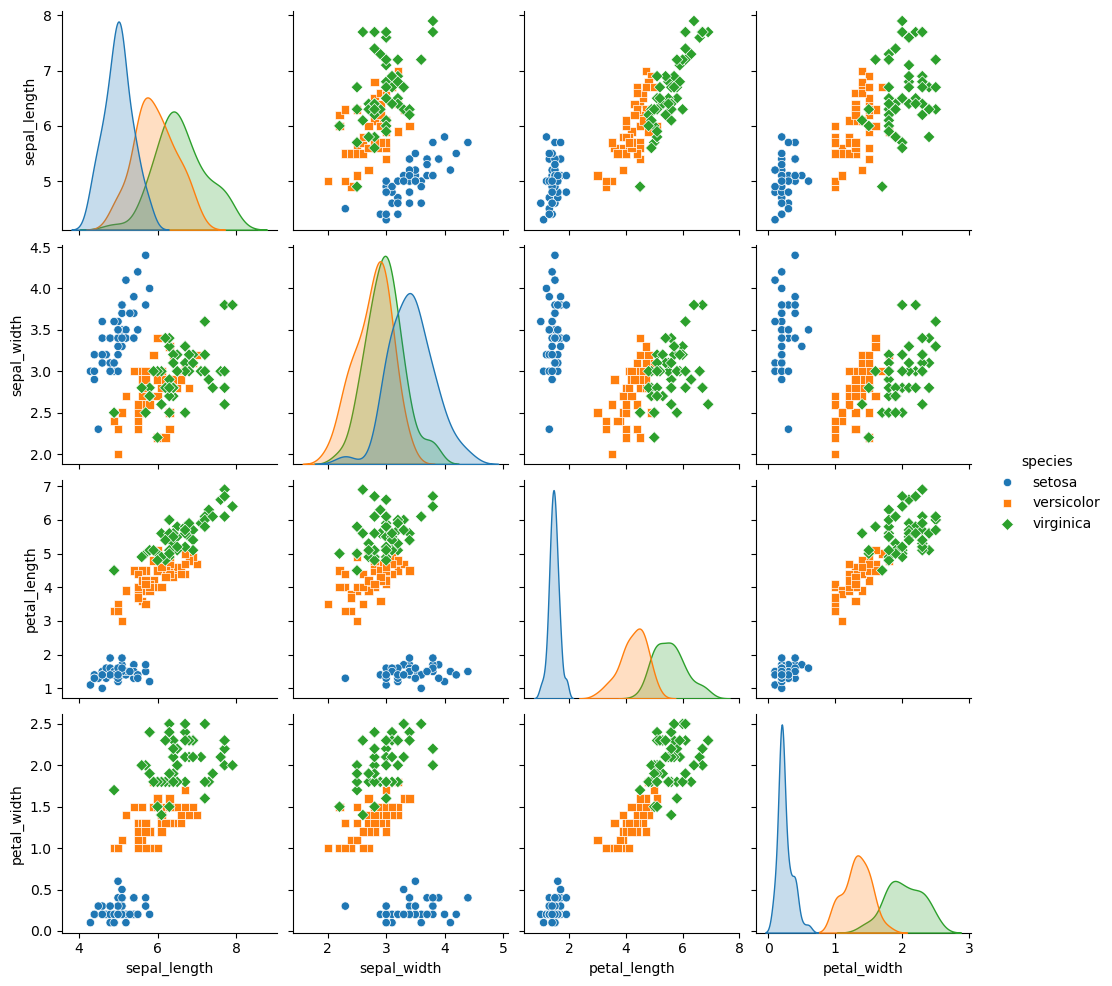

In [ ]:
sns.pairplot(df, hue = "species", markers=["o", "s", "D"])
# Veri setindeki tüm değişkenlerin birbiriyle olan ilişkilerini görselleştirir ve türlerine göre renklendirir ve işaretlerini değiştirir.

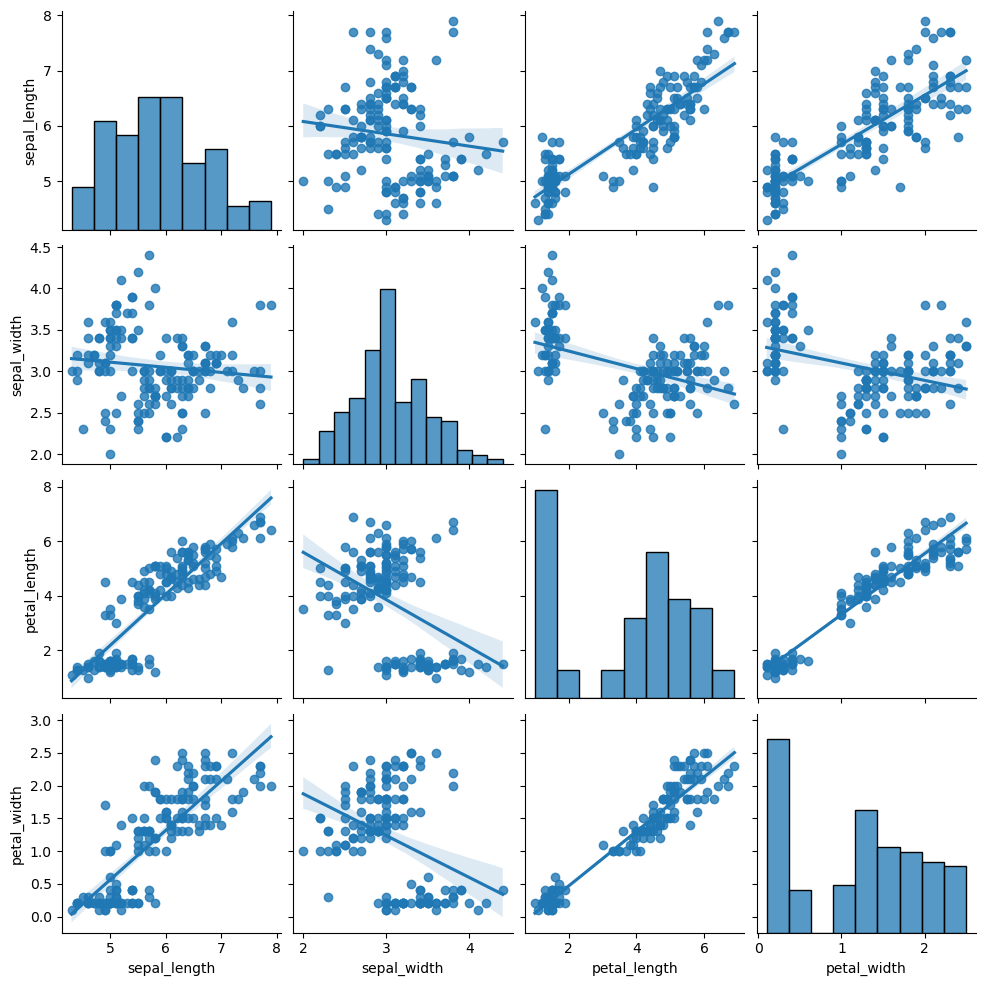

In [11]:
sns.pairplot(df, kind = "reg")
# Veri setindeki tüm değişkenlerin birbiriyle olan ilişkilerini görselleştirir ve regresyon çizgileri ekler.

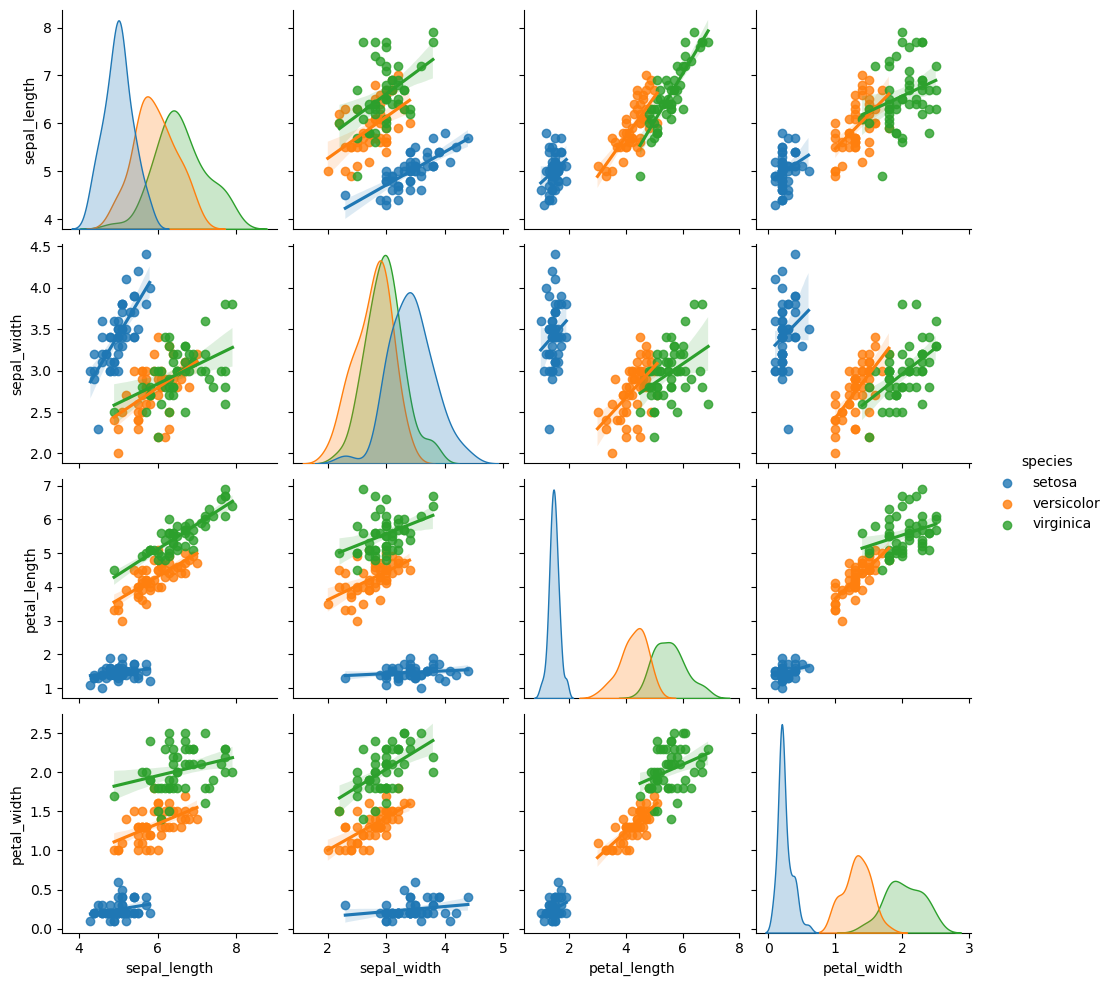

In [ ]:
sns.pairplot(df, kind = "reg", hue = "species")
# Veri setindeki tüm değişkenlerin birbiriyle olan ilişkilerini görselleştirir ve regresyon çizgileri ekler ve türlerine göre renklendirir.

## Isı Haritası (Heat Map)

* Heatmap, matris formundaki verileri renk yoğunluğu ile görselleştiren bir grafik türüdür. Genellikle korelasyon matrislerini göstermek için kullanılır.

> 📌 Heatmap Nedir?
* Matris (tablo) biçimindeki verileri renklerle gösterir.
* Yoğunluk farklarını renk geçişleriyle ifade eder.
* Özellikle korelasyon analizinde sıkça kullanılır.

> 🔥 Kod Açıklamaları
* ✅ iris.corr() → Korelasyon matrisini hesaplar.
* ✅ sns.heatmap() → Isı haritası oluşturur.
* ✅ annot=True → Hücrelere korelasyon değerlerini yazar.
* ✅ cmap="coolwarm" → Renk paleti belirler (soğuk → sıcak).
* ✅ fmt=".2f" → Sayıları iki ondalık basamakla gösterir.
* ✅ plt.figure(figsize=(8,6)) → Grafik boyutunu ayarlar.

🎨 Heatmap’i Özelleştirme
🔹 Farklı Renk Paletleri
  * "coolwarm" → Kırmızı-mavi geçişleri
  * "viridis" → Yeşil-mavi-sarı tonları
  * "magma" → Siyah-kırmızı-sarı geçişleri

### 🔹 Üçgen Korelasyon Heatmap (Gereksiz Tekrarları Kaldırma)
Korelasyon matrisi simetrik olduğu için, gereksiz tekrarları kaldırabiliriz:

  * ✅ np.triu() → Üçgen maske oluşturur.
  * ✅ mask=mask → Üst üçgeni gizler, böylece gereksiz tekrarlar     olmaz.

### 🎯 Heatmap Kullanım Senaryoları
  * 📌 Korelasyon Analizi → Değişkenler arasındaki ilişkileri incelemek için.
  * 📌 Özellik Seçimi (Feature Selection) → En etkili değişkenleri belirlemek için.
  * 📌 Kategorik Veri Analizi → Örneğin, müşteri segmentasyonunda yoğunluk analizleri yapmak için.



In [13]:
import seaborn as sns
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [14]:
df.shape

(144, 3)

In [15]:
df["passengers"].describe().T

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [19]:
df = df.pivot(index="month", columns="year", values="passengers")


In [20]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [21]:
df.shape

(12, 12)

<Axes: xlabel='year', ylabel='month'>

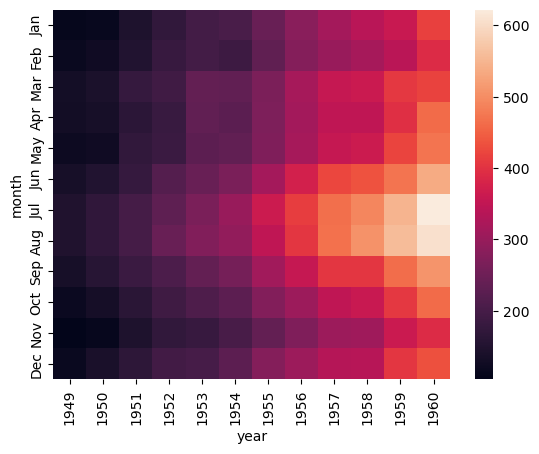

In [23]:
sns.heatmap(df)
# Veri setindeki değişkenler arasındaki ilişkiyi ısı haritası ile görselleştirir.

<Axes: xlabel='year', ylabel='month'>

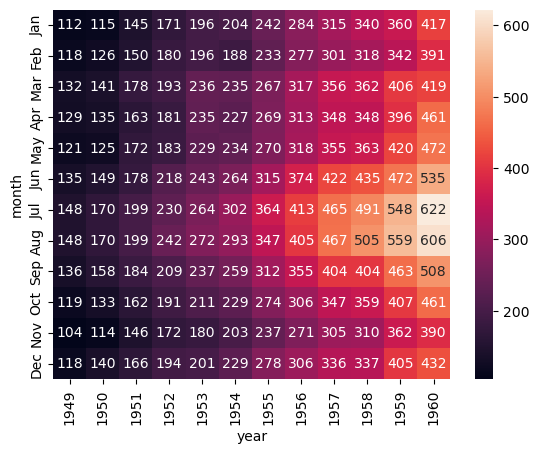

In [ ]:
sns.heatmap(df, annot = True, fmt = "d")
# Veri setindeki değişkenler arasındaki ilişkiyi ısı haritası ile görselleştirir ve değerlerini yazar.

<Axes: xlabel='year', ylabel='month'>

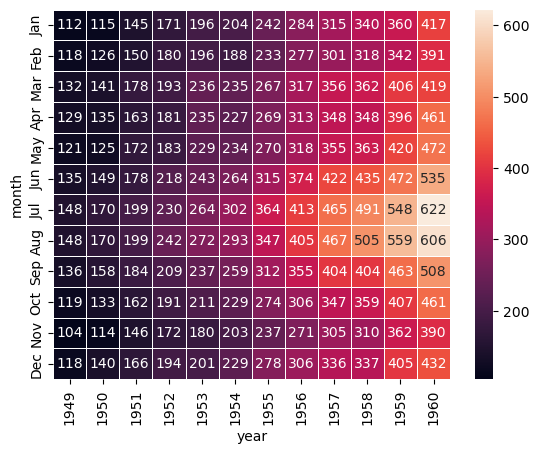

In [26]:
sns.heatmap(df, annot = True, fmt = "d", linewidths=0.5)
# Veri setindeki değişkenler arasındaki ilişkiyi ısı haritası ile görselleştirir ve değerlerini yazar ve çizgi kalınlığını ayarlar.

<Axes: xlabel='year', ylabel='month'>

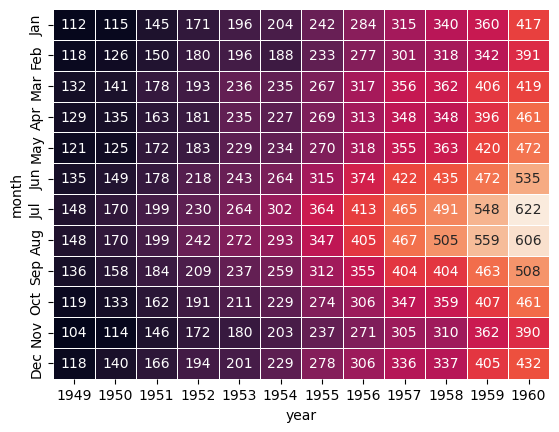

In [27]:
sns.heatmap(df, annot = True, fmt = "d", linewidths=0.5, cbar=False)
# Veri setindeki değişkenler arası ilişkiyi ısı haritası ile görselleştirir ve değerlerini yazar ve çizgi kalınlığını ayarlar ve renk çubuğunu kaldırır.